# Agriculture and rural development indicators for Bangladesh

#### Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### DATA 

In [2]:
# Let's take a quick look at what the data looks like:
# Load the data into pandas
df = pd.read_csv('agriculture-and-rural-development-indicators-for-bangladesh-1.csv', skiprows=[1])
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Bangladesh,BGD,2000,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1000.0
1,Bangladesh,BGD,1999,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1080.0
2,Bangladesh,BGD,1998,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1200.0
3,Bangladesh,BGD,1997,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1300.0
4,Bangladesh,BGD,1996,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1400.0


In [3]:
# Data Size: how many rows and columns in the data set?
df.shape

(1633, 6)

There are total 1633 records for 6 features.

In [4]:
# Columns name
df.columns

Index(['Country Name', 'Country ISO3', 'Year', 'Indicator Name',
       'Indicator Code', 'Value'],
      dtype='object')

In [5]:
# Renaming Column Name / Inplace
df.rename(columns={'Country Name':'Country','Indicator Name':'Indicator'},inplace=True)

In [6]:
df.columns

Index(['Country', 'Country ISO3', 'Year', 'Indicator', 'Indicator Code',
       'Value'],
      dtype='object')

In [7]:
# Get data type for all these 32 features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 6 columns):
Country           1633 non-null object
Country ISO3      1633 non-null object
Year              1633 non-null int64
Indicator         1633 non-null object
Indicator Code    1633 non-null object
Value             1633 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 76.6+ KB


Here, we have integers, float and object i.e. aplhabets variables.

Also, it is observed that there are not null values for all features, as the count is equal to total number of records.

In [8]:
# Statistical info of numeric variables
df.describe()

,Year,Value
count,1633.000000,1.633000e+03
mean,1990.904470,3.983598e+08
std,15.908191,2.528876e+09
min,1960.000000,-1.639927e-01
25%,1978.000000,4.145000e+01
50%,1992.000000,8.257241e+01
75%,2004.000000,1.042700e+05
max,2019.000000,3.582689e+10


#### Missing Data

In [9]:
#to check whether dataset is empty or not
df.isnull().sum().sum()

0

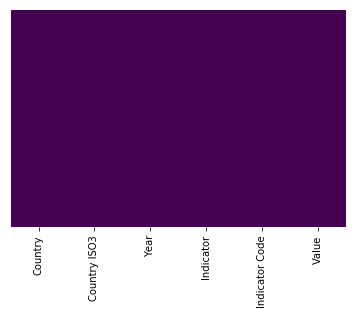

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Good, the dataset has no any missing values

#### Duplicate rows

In [11]:
# count the duplicate rows
df.duplicated().sum()

0

#### Outlier

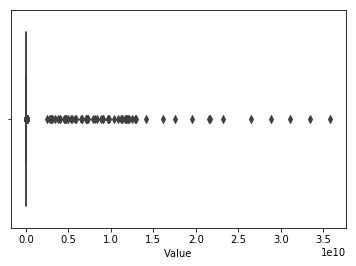

In [12]:
# Outlier of data
sns.boxplot(df['Value'])
plt.show()

In [13]:
# To Delete unwanted columns from the dataframe
df.drop(['Country ISO3','Indicator Code'], axis=1,inplace=True)

In [14]:
# -> covert 'Value' to Value_millions
df['Value_millions'] = pd.to_numeric(df['Value'], errors='coerce')/1e6

In [15]:
# To Delete 'Value' column from the dataframe
df.drop(['Value'], axis=1,inplace=True)

In [16]:
df.columns

Index(['Country', 'Year', 'Indicator', 'Value_millions'], dtype='object')

#### Save new csv file

In [17]:
df.to_csv("new_file.csv", index=False, encoding='utf8')